In [129]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os 
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dt

In [86]:
path = "C:\\Users\Mehul Gupta\\OneDrive\\Documents\\GitHub\\EDA1"

In [87]:
os.chdir(path)
os.listdir()

['.git', 'EDA.ipynb', 'README.md', 'titanic_train.csv']

In [88]:
train = pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking missing value 

In [89]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

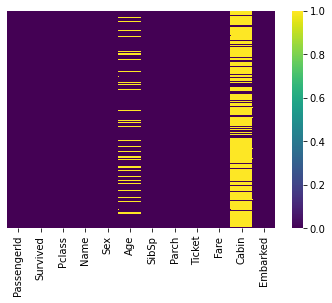

In [90]:
sns.heatmap(data = train.isnull(), yticklabels=False, cmap=('viridis'))

<AxesSubplot:xlabel='Survived', ylabel='count'>

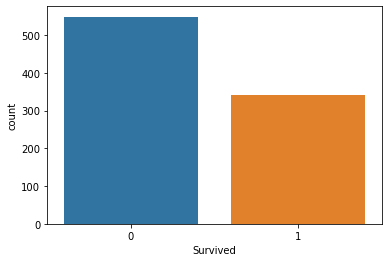

In [91]:
sns.countplot(data = train, x = "Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

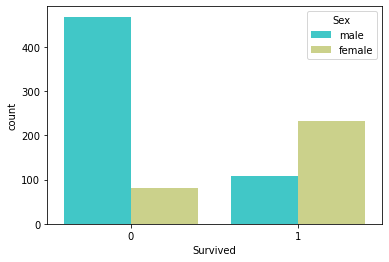

In [92]:
sns.countplot(data = train, x = 'Survived', hue = 'Sex',palette="rainbow" )

<AxesSubplot:xlabel='Survived', ylabel='count'>

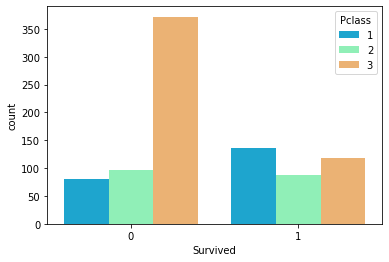

In [93]:
sns.countplot(data = train, hue = 'Pclass', x = 'Survived', palette="rainbow")

<AxesSubplot:xlabel='Age'>

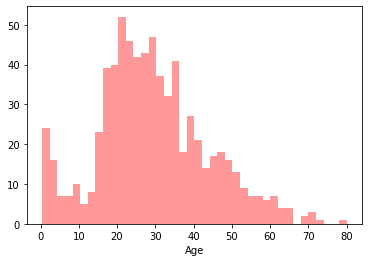

In [94]:
sns.distplot(train['Age'].dropna(),bins=40, kde = False, color= 'red' )

<AxesSubplot:xlabel='Age'>

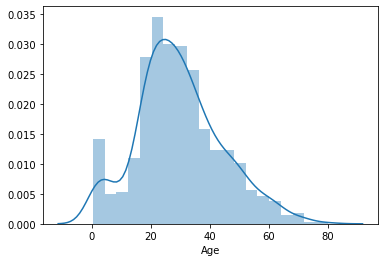

In [95]:
sns.distplot(train['Age'], )

<AxesSubplot:xlabel='SibSp', ylabel='count'>

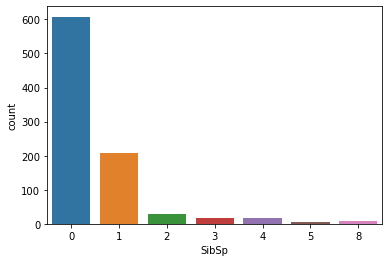

In [96]:
sns.countplot(x = "SibSp", data = train)

<AxesSubplot:>

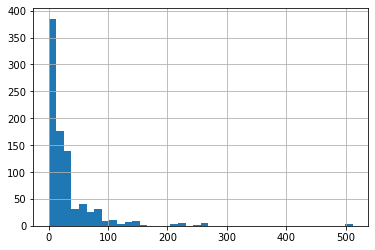

In [97]:
train['Fare'].hist(bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

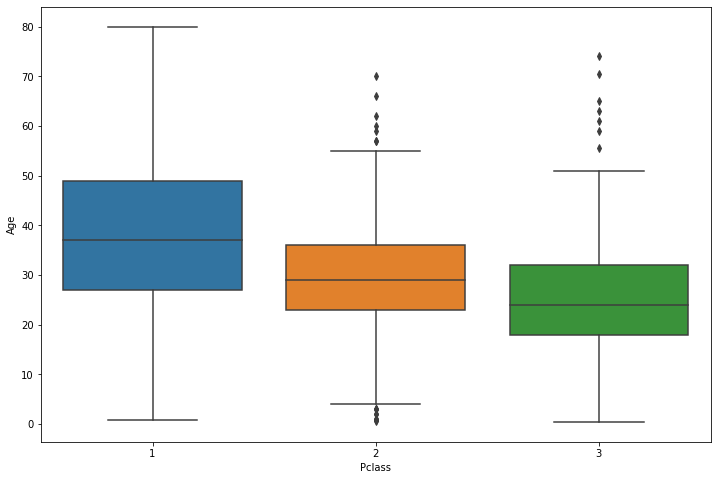

In [98]:
plt.figure(figsize= (12,8))
sns.boxplot(data = train, x = 'Pclass', y = 'Age')

In [99]:
def Avg_Age(Cols):
    Age = Cols[0]
    Pclass = Cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24 
    else :
        return Age
    

In [100]:
train['Age'] = train[['Age', 'Pclass']].apply(Avg_Age, axis = 1)

<AxesSubplot:>

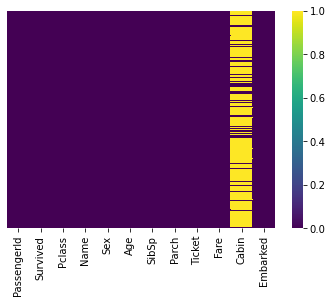

In [101]:
sns.heatmap(data = train.isnull(), yticklabels=False, cmap=('viridis'))

In [102]:
train.drop('Cabin', inplace=True , axis = 1)

In [103]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [104]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
sex =  pd.get_dummies(train['Sex'], drop_first=True)

In [105]:
train.drop(['Sex','Embarked', 'Ticket', 'Name' ], axis = 1, inplace=True )

In [106]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [107]:
train = pd.concat([train, sex, embark], axis = 1)

In [108]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [110]:
y = train.pop('Survived')

In [ ]:
y.head()

In [113]:
X = train

In [114]:
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,    # Predictors
                                                    y,                   # Target
                                                    test_size = 0.3      # split-ratio
                                                    )

# This is First example to determine accuracy via Logistics Regression

In [116]:
clf_LR = LogisticRegression()

In [117]:
clf_LR.fit(X_train,y_train)

C:\Users\Mehul Gupta\data_analyst\envs\sklearn\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
clf_pred = clf_LR.predict(X_test)

In [120]:
np.sum(clf_pred == y_test)/y_test.values.size
clf_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [122]:
np.sum(clf_pred == y_test)/y_test.values.size

0.7835820895522388

# This is Second example to determine accuracy via Logistics Regression

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
accuracy = confusion_matrix(y_test, clf_pred)
accuracy 

array([[143,  21],
       [ 37,  67]], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,clf_pred)
accuracy

0.7835820895522388

# This exaample to determine accuracy via Decision Tree

In [130]:
clf_DT = dt()

In [131]:
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [132]:
clf_dt_pred = clf_DT.predict(X_test)

In [133]:
clf_dt_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [134]:
np.sum(clf_dt_pred == y_test)/y_test.values.size

0.7798507462686567

by comparing both algorithem we found that logistics Regression giving best accuracy 